## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Github link: https://github.com/tsuhsuanchu/assignment3/blob/0973ce2e1f6a3f8c61e129e5b95b998f95b493f2/Assignment_3_Part_2.ipynb


Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [60]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
path = "/Users/debbie8265/Desktop/Computing_for_data_analytics/titanic.csv"
titanic=pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [62]:
titanic['Survived'] = titanic['Survived'].astype('object')
titanic['Pclass'] = titanic['Pclass'].astype('object')
titanic.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [63]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [64]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [65]:
titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [66]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [67]:
titanic['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [68]:
titanic['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [69]:
list[[titanic['Age'].mean(), titanic['Age'].min(), titanic['Age'].max()]]

list[[29.69911764705882, 0.42, 80.0]]

In [70]:
list[[titanic['SibSp'].mean(), titanic['SibSp'].min(), titanic['SibSp'].max(),titanic['SibSp'].mode()]]

list[[0.5230078563411896, 0, 8, 0    0
Name: SibSp, dtype: int64]]

In [71]:
list[[titanic['Parch'].mean(), titanic['Parch'].min(), titanic['Parch'].max(),titanic['Parch'].mode()]]

list[[0.38159371492704824, 0, 6, 0    0
Name: Parch, dtype: int64]]

In [72]:
list[[titanic['Fare'].mean(), titanic['Fare'].min(), titanic['Fare'].max(),titanic['Fare'].mode()]]

list[[32.2042079685746, 0.0, 512.3292, 0    8.05
Name: Fare, dtype: float64]]

In [73]:
titanic['Cabin'].count()

204

In [74]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
titanic['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

Summary

- There were a total of 891 passengers on Titanic
- 549 people died and 342 lived; 62% died and 38% lived
- There were 216 (24%) people in 1st class, 184 (21%) in 2nd class, and 491 (55%) in 3rd class
- There were around 64% male and 36% female on the ship
- The average age was around 29 years old, the youngest was around 5 months old, the oldest was 80 years old
- Most people have 0 silbling onboard, the avergae is 0.5 siblings, the maximum number of siblings a person have onboard is 8
- Most people have 0 parents/children onboard, the avergae is 0.3 parents/children, the maximum number of parents/children a person have onboard is 6
- Most people got a ticket fare of 8.05 pounds, the average is around 32 pounds, minimum fare price is 0 pounds, and maximum fare price was around 512 pounds
- There were a total of 204 cabins onboard
- 644 people (72%) boarded from Southampton, 168 (18%) from Cherbourg, and 77 (8%) from Queenstown.

In [76]:
titanic['Survived'].replace([1, 0],['lived', 'died'], inplace=True)
titanic['Pclass'].replace([1, 2, 3],['1', '2', '3'], inplace=True)

## Hypothesis 1

- H0: Survival rate IS NOT associated with the class of passenger
- H1: Survival rate IS associated with the class of passenger

[Text(0.5, 0, 'Class of passenger'), Text(0, 0.5, 'Count')]

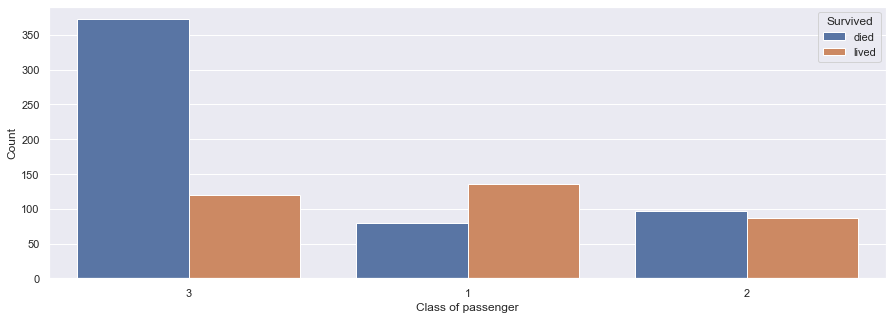

In [77]:
#barplots of Survived and Pclass
sns.set(rc = {'figure.figsize':(15,5)})
a=sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)
a.set(xlabel='Class of passenger', ylabel='Count')

- We can see that there's significantly more death for the 3rd class passengers, followed by the 2nd class passengers, then the 1st class passengers. 
- Only the 1st class passengers have more people who lived than died
- Based on the plot, it's very likely that the survival rate IS associated with the class of passenger

In [78]:
table1=pd.crosstab(titanic["Survived"],titanic["Pclass"])
table1

Pclass,1,2,3
Survived,,,
died,80,97,372
lived,136,87,119


In [79]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table1)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     102.89
p-value:            4.5493e-23
degrees of freedom: 2
expected frequencies:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Conclusion: 

- The critical value for the chi-square test with a degree of freedom of 2 and alpha 0.05 is 5.99.
- Chi Square statistic (102.89) exceeds the critical value (5.99) so the null hypothesis is rejected.
- Survival rate IS associated with the class of passenger. Survival rate and the class of passenger are dependent on each other. 

## Hypothesis 2

- H0: Survival rate IS NOT associated with age
- H1: Survival rate IS associated with age

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Count')]

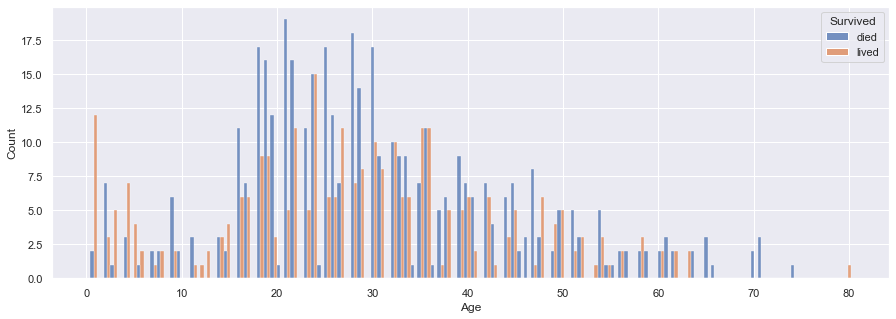

In [80]:
#barplots of Survived and Ages
sns.set(rc = {'figure.figsize':(15,5)})
b=sns.histplot(binwidth=0.7,
             bins = 5,
            x=titanic["Age"],
            hue=titanic["Survived"],
            data=titanic,
            stat="count",
            multiple="dodge")

b.set(xlabel='Age', ylabel='Count')

- More people lived than died for children under 8 and elders over 80 (including)
- More people died than lived for people aged between 10 to 79
- Based on the plot, survival rate is likely associated with age

In [81]:
titanic['Age']=pd.cut(titanic['Age'], bins=16)

In [82]:
table2=pd.crosstab(titanic["Survived"],titanic["Age"])
table2

Age,"(0.34, 5.394]","(5.394, 10.368]","(10.368, 15.341]","(15.341, 20.315]","(20.315, 25.289]","(25.289, 30.263]","(30.263, 35.236]","(35.236, 40.21]","(40.21, 45.184]","(45.184, 50.158]","(50.158, 55.131]","(55.131, 60.105]","(60.105, 65.079]","(65.079, 70.052]","(70.052, 75.026]","(75.026, 80.0]"
Survived,,,,,,,,,,,,,,,,
died,13,13,8,63,80,66,47,39,30,23,14,11,10,3,4,0
lived,31,7,11,33,42,42,41,28,17,16,10,7,4,0,0,1


In [83]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table2)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     31.331
p-value:            0.0079308
degrees of freedom: 15
expected frequencies:
 [[26.12885154 11.8767507  11.28291317 57.00840336 72.44817927 64.13445378
  52.25770308 39.78711485 27.91036415 23.15966387 14.25210084 10.68907563
   8.31372549  1.78151261  2.37535014  0.59383754]
 [17.87114846  8.1232493   7.71708683 38.99159664 49.55182073 43.86554622
  35.74229692 27.21288515 19.08963585 15.84033613  9.74789916  7.31092437
   5.68627451  1.21848739  1.62464986  0.40616246]]


Conclusion: 

- The critical value for the chi-square test with a degree of freedom of 15 and alpha 0.05 is around 7.261.
- Chi Square statistic (31.331) exceeds the critical value (7.261) so the null hypothesis is rejected.
- Survival rate IS associated with the age of passenger. Survival rate and the age of passenger are dependent on each other. 

## Hypothesis 3

- H0: Survival rate IS NOT associated with gender
- H1: Survival rate IS associated with gender

[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'Count')]

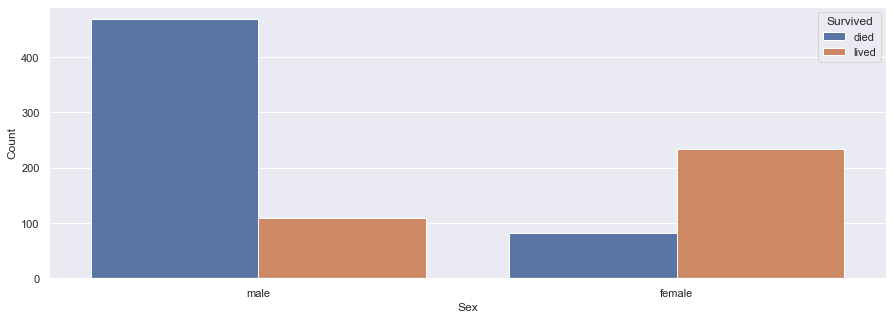

In [102]:
#barplots of Survived and Sex
sns.set(rc = {'figure.figsize':(15,5)})
c=sns.countplot(x = 'Sex', hue = 'Survived', data = titanic)
c.set(xlabel='Sex', ylabel='Count')

- More people lived than died for females
- More people died than lived for males
- Based on the plot, survival rate is likely associated with gender

In [121]:
table3=pd.crosstab(titanic["Survived"],titanic["Sex"])
table3

Sex,female,male
Survived,,
died,81,468
lived,233,109


In [122]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table3)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     260.72
p-value:            1.1974e-58
degrees of freedom: 1
expected frequencies:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


Conclusion: 

- The critical value for the chi-square test with a degree of freedom of 1 and alpha 0.05 is around 3.84.
- Chi Square statistic (260.72) exceeds the critical value (3.84) so the null hypothesis is rejected.
- Survival rate IS associated with the gender of passenger. Survival rate and the gender of passenger are dependent on each other. 